In [2]:
import pandas as pd


In [3]:
file_path = r"C:\Users\majji\Downloads\Data_Analyst_Assignment_Dataset.csv"
data = pd.read_csv(file_path)

In [4]:
print(data.head())

   Amount Pending      State  Tenure  Interest Rate       City Bounce String  \
0             963  Karnataka      11           7.69  Bangalore           SSS   
1            1194  Karnataka      11           6.16  Bangalore           SSB   
2            1807  Karnataka      14           4.24     Hassan           BBS   
3            2451  Karnataka      10           4.70  Bangalore           SSS   
4            2611  Karnataka      10           4.41     Mysore           SSB   

   Disbursed Amount Loan Number  
0             10197       JZ6FS  
1             12738       RDIOY  
2             24640       WNW4L  
3             23990       6LBJS  
4             25590       ZFZUA  


In [5]:
print(data.describe())

       Amount Pending        Tenure  Interest Rate  Disbursed Amount
count    24582.000000  24582.000000   24582.000000      24582.000000
mean      1791.172687      9.415263       0.934960      17705.195468
std        937.565507      3.238904       3.114732      14192.671509
min        423.000000      7.000000       0.000000       2793.000000
25%       1199.000000      8.000000       0.000000       9857.750000
50%       1593.000000      8.000000       0.000000      13592.000000
75%       2083.000000     11.000000       0.000000      19968.000000
max      13349.000000     24.000000      37.920000     141072.000000


In [6]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24582 entries, 0 to 24581
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Amount Pending    24582 non-null  int64  
 1   State             24582 non-null  object 
 2   Tenure            24582 non-null  int64  
 3   Interest Rate     24582 non-null  float64
 4   City              24582 non-null  object 
 5   Bounce String     24582 non-null  object 
 6   Disbursed Amount  24582 non-null  int64  
 7   Loan Number       24582 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.5+ MB
None


In [7]:
data.isnull().sum()

Amount Pending      0
State               0
Tenure              0
Interest Rate       0
City                0
Bounce String       0
Disbursed Amount    0
Loan Number         0
dtype: int64

In [8]:
def assign_risk_label(row):
    bounce_chars = ['B', 'L']
    no_bounce_chars = ['S', 'H']
    
    # Count the number of bounce characters in the first 6 months
    bounce_count = sum(1 for char in row['Bounce String'][:6] if char in bounce_chars)
    
    # Check if 'FEMI' is present, indicating a new customer with unknown behavior
    if 'FEMI' in row['Bounce String']:
        return 'Unknown Risk'
    
    # Check if there are no bounces in the last 6 months
    elif bounce_count == 0:
        return 'Low Risk'
    
    # Check if the 'Bounce String' length is at least 6 and there are less than two bounces
    elif len(row['Bounce String']) >= 6 and bounce_count < 2 and row['Bounce String'][5] not in bounce_chars:
        return 'Medium Risk'
    
    # Otherwise, classify as 'High Risk'
    else:
        return 'High Risk'



# Apply the function to create a new column 'Risk Label'
data['Risk Label'] = data.apply(assign_risk_label, axis=1)

In [9]:
def assign_ticket_size_label(row, ticket_size_bins):
    amount_pending = row['Amount Pending']
    
    # Iterate through ticket size bins and assign label based on amount pending
    for label, (lower, upper) in ticket_size_bins.items():
        if lower <= amount_pending < upper:
            return label
    
    return 'Unknown Ticket Size'

# Calculate the quartiles for amount pending
amount_pending_quartiles = data['Amount Pending'].quantile([0.25, 0.5, 0.75])

# Define bins for low, medium, and high ticket size based on quartiles
ticket_size_bins = {
    'Low ticket size': (0, amount_pending_quartiles[0.25]),
    'Medium ticket size': (amount_pending_quartiles[0.25], amount_pending_quartiles[0.75]),
    'High ticket size': (amount_pending_quartiles[0.75], float('inf'))
} 

# Apply function to assign ticket size label
data['Ticket Size Label'] = data.apply(assign_ticket_size_label, args=(ticket_size_bins,), axis=1)


In [24]:
def assign_tenure_category(row):
    bounce_chars = ['B', 'L']
    no_bounce_chars = ['S', 'H']
    
    # Extracting the bounce behavior from the bounce string
    bounce_behavior = row['Bounce String'][:3]
    
    # Check if the borrower is in early tenure
    if all(char in no_bounce_chars for char in bounce_behavior):
        return 'Early Tenure'
    
    # Check if the borrower is in late tenure
    elif all(char in no_bounce_chars for char in row['Bounce String'][-3:]):
        return 'Late Tenure'
    
    # All other borrowers are in mid tenure
    else:  
        return 'Mid Tenure'

# Apply the function to create a new column 'Tenure Category'
data['Tenure Category'] = data.apply(assign_tenure_category, axis=1)

# Display the first few rows to verify the new column
print(data[['Bounce String', 'Tenure Category']].head())


  Bounce String Tenure Category
0           SSS    Early Tenure
1           SSB      Mid Tenure
2           BBS      Mid Tenure
3           SSS    Early Tenure
4           SSB      Mid Tenure


In [25]:
data.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Ticket Size Label,Channel,Tenure Category
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low Risk,Low ticket size,Whatsapp Bot,Early Tenure
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk,Low ticket size,Human Calling,Mid Tenure
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Medium ticket size,Human Calling,Mid Tenure
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low Risk,High ticket size,Whatsapp Bot,Early Tenure
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk,High ticket size,Human Calling,Mid Tenure


In [31]:
# List of metropolitan cities
metropolitan_cities = ['Mumbai', 'Delhi', 'Bangalore', 'Kolkata', 'Chennai', 'Hyderabad', 'Ahmedabad', 'Pune']

# Segment borrowers into channels based on criteria
def recommend_channel(row):
    if row['Risk Label'] == 'Low Risk'or row['Risk Label'] == 'Medium Risk'or  row['Risk Label'] == 'High Risk':
        return 'Whatsapp Bot'
    elif row['City'] in metropolitan_cities and row['Interest Rate'] < 5:
        return 'Voice Bot'
    else:
        return 'Human Calling'

# Apply function to create a new column 'Channel'
data['Channel'] = data.apply(recommend_channel, axis=1)

# Calculate overall spend for each channel
whatsapp_spend = (data['Channel'] == 'Whatsapp Bot').sum() * 5
voice_spend = (data['Channel'] == 'Voice Bot').sum() * 10
human_calling_spend = (data['Channel'] == 'Human Calling').sum() * 50

# Print overall spend for each channel
print("Overall spend for Whatsapp Bot: ₹", whatsapp_spend)
print("Overall spend for Voice Bot: ₹", voice_spend)
print("Overall spend for Human Calling: ₹", human_calling_spend)

Overall spend for Whatsapp Bot: ₹ 106800
Overall spend for Voice Bot: ₹ 6600
Overall spend for Human Calling: ₹ 128100


In [27]:
data.head(20)

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Ticket Size Label,Channel,Tenure Category
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low Risk,Low ticket size,Whatsapp Bot,Early Tenure
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk,Low ticket size,Human Calling,Mid Tenure
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Medium ticket size,Human Calling,Mid Tenure
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low Risk,High ticket size,Whatsapp Bot,Early Tenure
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk,High ticket size,Human Calling,Mid Tenure
5,2172,Karnataka,14,4.36,DAKSHINA KANNADA,SSB,29596,T07RO,High Risk,High ticket size,Human Calling,Mid Tenure
6,1041,Karnataka,10,5.77,BANGALORE RURAL,SSB,10140,Y0M29,High Risk,Low ticket size,Human Calling,Mid Tenure
7,1585,Karnataka,10,6.47,Bangalore,SSS,15390,OE4AV,Low Risk,Medium ticket size,Whatsapp Bot,Early Tenure
8,983,Karnataka,11,6.03,DAKSHINA KANNADA,SSS,10494,2MR0X,Low Risk,Low ticket size,Whatsapp Bot,Early Tenure
9,1600,Karnataka,14,4.80,Mysore,SSS,21742,MK67U,Low Risk,Medium ticket size,Whatsapp Bot,Early Tenure


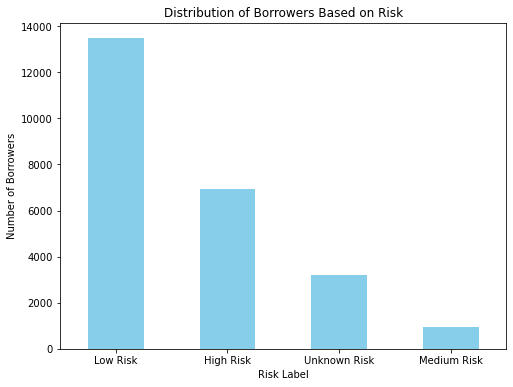

Summary of Borrowers Based on Risk:
Low Risk        13477
High Risk        6938
Unknown Risk     3222
Medium Risk       945
Name: Risk Label, dtype: int64


In [14]:
import matplotlib.pyplot as plt

# Summary table of borrowers based on risk
risk_summary = data['Risk Label'].value_counts()

# Plotting the distribution of borrowers based on risk
plt.figure(figsize=(8, 6))
risk_summary.plot(kind='bar', color='skyblue')
plt.title('Distribution of Borrowers Based on Risk')
plt.xlabel('Risk Label')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=0)
plt.show()
print("Summary of Borrowers Based on Risk:")
print(risk_summary)


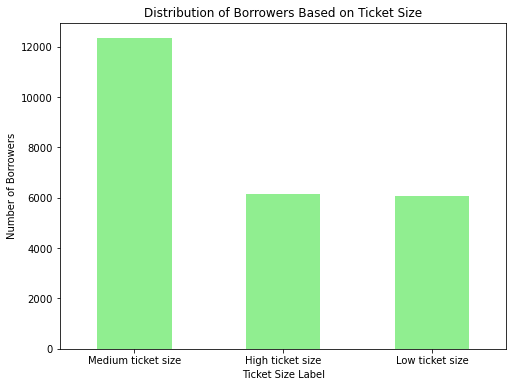


Summary of Borrowers Based on Ticket Size:
Medium ticket size    12339
High ticket size       6160
Low ticket size        6083
Name: Ticket Size Label, dtype: int64


In [16]:
# Summary table of borrowers based on ticket size
ticket_size_summary = data['Ticket Size Label'].value_counts()

# Plotting the distribution of borrowers based on ticket size
plt.figure(figsize=(8, 6))
ticket_size_summary.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Borrowers Based on Ticket Size')
plt.xlabel('Ticket Size Label')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=0)
plt.show()

print("\nSummary of Borrowers Based on Ticket Size:")
print(ticket_size_summary)


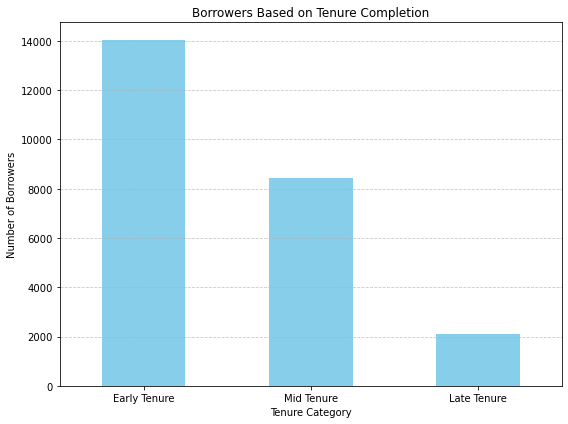

In [28]:
import matplotlib.pyplot as plt

# Count the number of borrowers in each tenure category
tenure_counts = data['Tenure Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
tenure_counts.plot(kind='bar', color='skyblue')
plt.title('Borrowers Based on Tenure Completion')
plt.xlabel('Tenure Category')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
